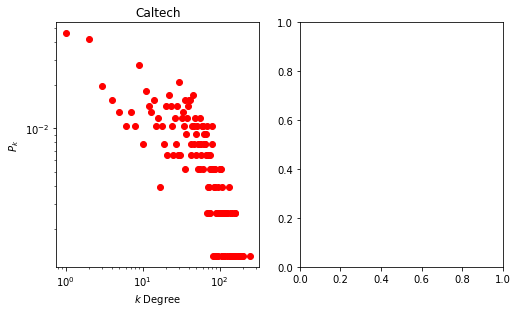

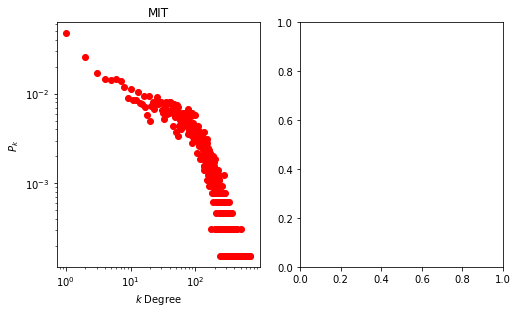

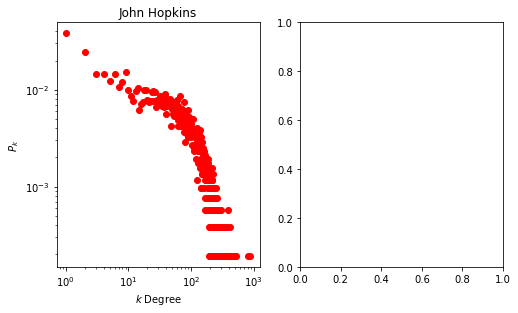

In [114]:
import networkx as nx
import matplotlib.pylab as plt
import numpy as np



#Plot the degree distribution

Gcal, Gmit, Gjh = nx.read_gml("data/Caltech36.gml"), nx.read_gml("data/MIT8.gml"), nx.read_gml("data/JohnsHopkins55.gml")


def plot_pdf(G, tittle):
    degree = [v for k,v in dict(G.degree()).items()]
    distribution = [(elem, degree.count(elem)) for elem in sorted(set(degree))]
    k,pk = zip(*distribution)
    PDF = np.array(pk)/sum(pk)
    #
    # Plots 
    #
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16/2,9/2))
    ax1.loglog(k, PDF, 'ro')
    ax1.set_xlabel("$k$ Degree")
    ax1.set_ylabel("$P_k$")
    ax1.set_title(tittle)
    
    
plot_pdf(Gcal, "Caltech")
plot_pdf(Gmit, "MIT")
plot_pdf(Gjh, "John Hopkins")


In [10]:
#grandes presences de noeuds complexes a fort degrés montrant que les utilisateurs sont en forte interactions.

In [16]:
import networkx as nx

Cmit = nx.average_clustering(Gmit)
Cjh = nx.average_clustering(Gjh)
Ccal = nx.average_clustering(Gcal)

print("Global clustering coefficient MIT:", Cmit)
print("Global clustering coefficient Caltech:", Ccal)
print("Global clustering coefficient John Hopkins:", Cjh)

Global clustering coefficient: 0.2712187419501315
Global clustering coefficient: 0.40929439048517247
Global clustering coefficient: 0.26839307371293525


In [20]:
def mean_local_cluester(G):
    local_clustering = nx.clustering(G)
    C = sum(local_clustering.values()) / len(local_clustering)
    print("Mean local clustering coefficient:", C)

mean_local_cluester(Gcal)
mean_local_cluester(Gmit)
mean_local_cluester(Gjh)

Mean local clustering coefficient: 0.40929439048517247
Mean local clustering coefficient: 0.2712187419501315
Mean local clustering coefficient: 0.26839307371293525


In [23]:
def edge_density(G):
    # compute the edge density
    n = len(G.nodes)
    m = len(G.edges)
    density = 2 * m / (n * (n-1))

    # compute the global clustering coefficient
    C = nx.average_clustering(G)

    # compute the local clustering coefficients
    local_clustering = nx.clustering(G)

    # compute the mean local clustering coefficient
    C_local = sum(local_clustering.values()) / len(local_clustering)

    print("Edge density:", density)
    print("Global clustering coefficient:", C)
    print("Mean local clustering coefficient:", C_local)
    
edge_density(Gcal)
edge_density(Gmit)
edge_density(Gjh)

Edge density: 0.05640442132639792
Global clustering coefficient: 0.40929439048517247
Mean local clustering coefficient: 0.40929439048517247
Edge density: 0.012118119495041378
Global clustering coefficient: 0.2712187419501315
Mean local clustering coefficient: 0.2712187419501315
Edge density: 0.013910200162372396
Global clustering coefficient: 0.26839307371293525
Mean local clustering coefficient: 0.26839307371293525


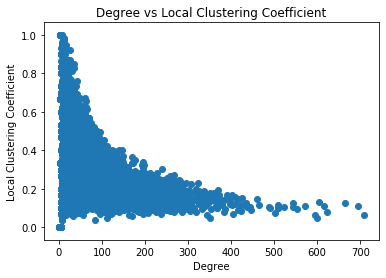

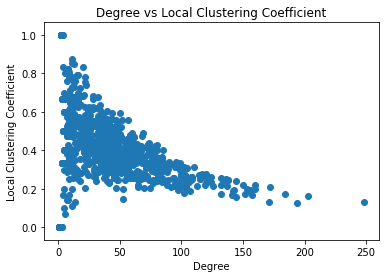

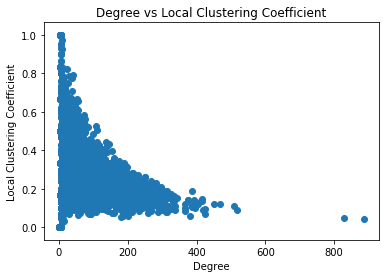

In [24]:
def plot_cluster(G):
    local_clustering = nx.clustering(G)
    degree = dict(G.degree())

    # plot the scatter plot
    plt.scatter(degree.values(), local_clustering.values())
    plt.title("Degree vs Local Clustering Coefficient")
    plt.xlabel("Degree")
    plt.ylabel("Local Clustering Coefficient")
    plt.show()
    
plot_cluster(Gmit)
plot_cluster(Gcal)
plot_cluster(Gjh)

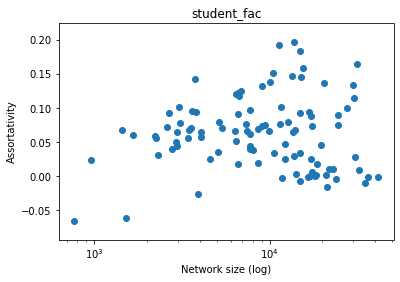

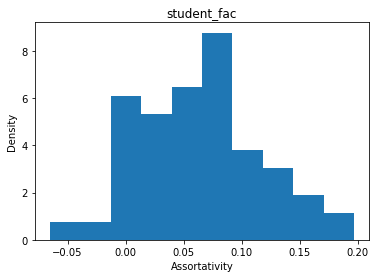

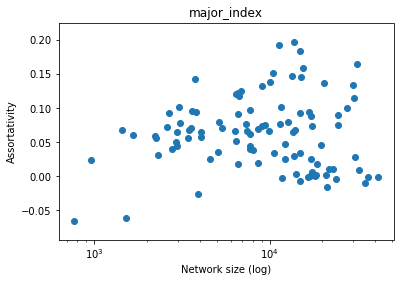

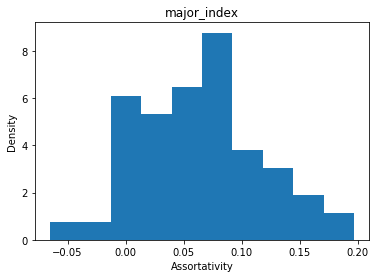

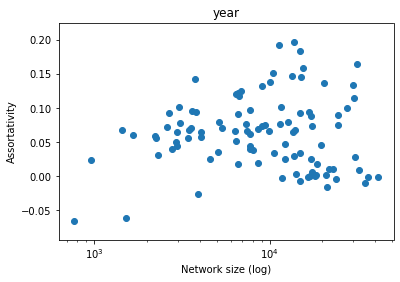

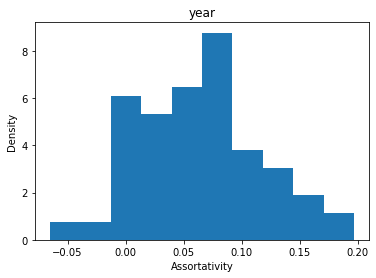

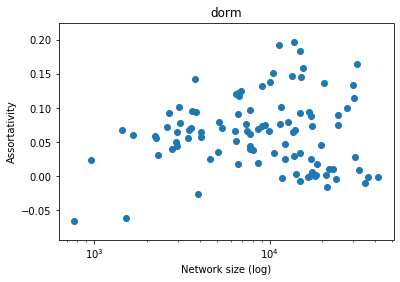

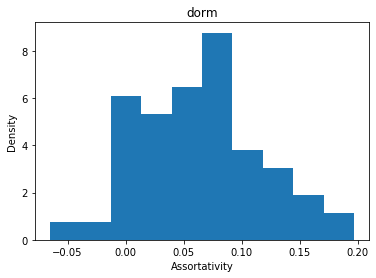

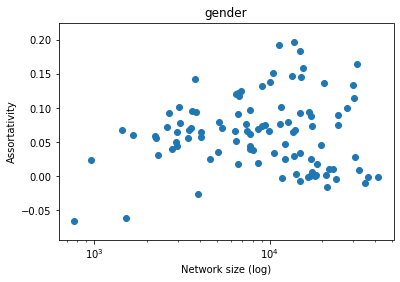

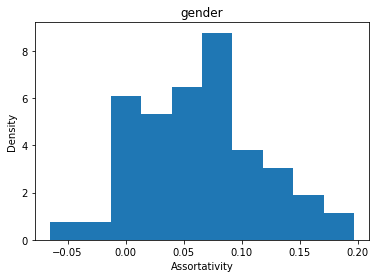

In [31]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os

# specify the directory containing the networks
network_dir = "data"

# assume that the vertex attributes have already been set up
attributes = ["student_fac", "major_index", "year", "dorm", "gender"]

# create lists to store assortativity values and network sizes for each attribute
assortativities = {attr: [] for attr in attributes}
network_sizes = {attr: [] for attr in attributes}

# loop through each network file in the directory
for filename in os.listdir(network_dir):
    if filename.endswith(".gml"):
        # load the network from the file
        
        filepath = os.path.join(network_dir, filename)
        G = nx.read_gml(filepath)

        # loop through each attribute
        for attribute in attributes:
            # get the attribute values for each node
            attribute_values = nx.get_node_attributes(G, attribute)

            # compute the assortativity and network size
            assortativity = nx.degree_assortativity_coefficient(G, attribute_values)
            network_size = len(G)

            # add the assortativity and network size to the lists
            assortativities[attribute].append(assortativity)
            network_sizes[attribute].append(network_size)

# create scatter plots and histograms/density plots for each attribute
for attribute in attributes:
    # create a scatter plot of assortativity versus network size
    plt.scatter(network_sizes[attribute], assortativities[attribute])
    plt.xscale('log')
    plt.xlabel("Network size (log)")
    plt.ylabel("Assortativity")
    plt.title(attribute)
    plt.show()

    # create a histogram or density plot of assortativity values
    plt.hist(assortativities[attribute], bins=10, density=True)
    plt.xlabel("Assortativity")
    plt.ylabel("Density")
    plt.title(attribute)
    plt.show()

In [101]:
from abc import ABC
from abc import abstractmethod
import networkx as nx
import numpy as np

class LinkPrediction(ABC):
    
    def __init__(self, graph):
        """ Constructor Parameters 
        ----------
        graph: Networkx graph """
        self._graph = graph
        self.N = len(graph)
        
    def neighbors(self, v): 
        
        """
        Return the neighbors list of a node
        Parameters
        ----------
        v: int node id
        Return
        ------
        neighbors_list: python list
        """
        
        neighbors_list = self._graph.neighbors(v)
        return list(neighbors_list)
    @abstractmethod
    
    def fit(self):
        raise NotImplementedError("Fit must be implemented")

class CommonNeighbors(LinkPrediction):
    def __init__(self, graph):
        super(CommonNeighbors , self).__init__(graph)

In [105]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np


class MyLinkPrediction(LinkPrediction):
    
    def __init__(self, graph):
        """ Constructor Parameters 
        ----------
        graph: Networkx graph """
        self._graph = graph
        self.N = len(graph)
    
    def predict(self, u, v):
        self._calculate_scores()
        return self._scores[u][v]
    
    def common_neighbors(self):
        adjacency_matrix = np.array(nx.adjacency_matrix(self._graph).todense())
        common_neighbors_matrix = np.matmul(adjacency_matrix, adjacency_matrix)
        np.fill_diagonal(common_neighbors_matrix, 0)
        return common_neighbors_matrix

    def jaccard(self):
        jaccard_matrix = np.zeros((len(self.common_neighbors()), len(self.common_neighbors())))
        for i in range(len(jaccard_matrix)):
            for j in range(len(jaccard_matrix)):
                if i == j:
                    jaccard_matrix[i][j] = 0.0
                else:
                    jaccard_matrix[i][j] = len(set(self._graph.neighbors(i)).union(set(self._graph.neighbors(j))))  / len(set(self._graph.neighbors(i)).intersection(set(self._graph.neighbors(j))))
        return jaccard_matrix

    def adamic_adar(self):
        adjacency_matrix = np.array(nx.adjacency_matrix(self._graph).todense())
        degree_matrix = np.diag(adjacency_matrix.sum(axis=1))
        degree_matrix_inv = np.linalg.inv(degree_matrix)
        adamic_adar_matrix = np.matmul(adjacency_matrix, np.matmul(degree_matrix_inv, adjacency_matrix))
        np.fill_diagonal(adamic_adar_matrix, 0)
        for i in range(len(adamic_adar_matrix)):
            for j in range(len(adamic_adar_matrix)):
                if i == j:
                    adamic_adar_matrix[i][j] = 0.0
                else:
                    common_neighbors = set(self._graph.neighbors(i)).intersection(set(self._graph.neighbors(j)))
                    adamic_adar_matrix[i][j] = sum([1/np.log(len(self._graph.neighbors(k))) for k in common_neighbors])
        return adamic_adar_matrix
    
    def _calculate_scores(self):
        self._scores = {}
        self._scores['common_neighbors'] = self.common_neighbors()
        self._scores['jaccard'] = self.jaccard()
        self._scores['adamic_adar'] = self.adamic_adar()

        for u, v in self._node_pairs:
            scores = [self._scores[name][u][v] for name in self._score_names]
            self._scores[u][v] = np.mean(scores)
            self._scores[v][u] = self._scores[u][v]
            
    def get_top_k_pairs(self, k):
        pairs = []
        for u, v in self._node_pairs:
            score = self.predict(u, v)
            pairs.append(((u, v), score))
        pairs_sorted = sorted(pairs, key=lambda x: x[1], reverse=True)
        top_k_pairs = pairs_sorted[:k]
        return top_k_pairs

    
    def fit(self):
        raise NotImplementedError("Fit must be implemented")

In [106]:
Gamh = nx.read_gml("data/Amherst41.gml")

In [99]:
import random

def random_remove(G):
    f = random.choice([.05, .1, .15, .2])

    # Determine the number of edges to remove
    num_edges = int(f * G.number_of_edges())

    # Randomly select the edges to remove
    edges_to_remove = random.sample(G.edges(), num_edges)

    # Remove the selected edges
    G.remove_edges_from(edges_to_remove)
    
random_remove(Gamh)

In [107]:
import itertools

lp = MyLinkPrediction(Gamh)

# Get all pairs of nodes in the graph
node_pairs = list(itertools.combinations(Gcal.nodes, 2))

# Compute predicted friendships for each pair of nodes
friendships = {}
for u, v in node_pairs:
    friendships[(u, v)] = lp.predict(u, v)
#This code computes the predicted friendship for each 


NetworkXError: The node 0 is not in the graph.

In [83]:
def evaluate_link_prediction(predictor, G, E_removed):
    N = len(G)
    node_pairs = [(u, v) for u in range(N) for v in range(u+1, N)]
    predicted_scores = []
    for u, v in node_pairs:
        predicted_scores.append((u, v, predictor.predict(u, v)))
    predicted_scores = sorted(predicted_scores, key=lambda x: x[2], reverse=True)
    k_values = [50, 100, 200, 300, 400]
    metrics = {}
    for k in k_values:
        top_k_predicted_edges = set([(u, v) for u, v, _ in predicted_scores[:k]])
        intersection_size = len(E_removed.intersection(top_k_predicted_edges))
        TP = intersection_size
        FP = len(top_k_predicted_edges - E_removed)
        FN = len(E_removed - top_k_predicted_edges)
        precision = TP / (TP + FP) if TP + FP > 0 else 0
        recall = TP / (TP + FN) if TP + FN > 0 else 0
        predictive_rate = (TP / k) * 100 if k > 0 else 0
        metrics[k] = {'precision': precision, 'recall': recall, 'predictive_rate': predictive_rate}
    return metrics

In [109]:

import networkx as nx
import numpy as np

class LabelPropagation:
    def __init__(self, graph):
        self.graph = graph
        self.num_nodes = len(graph)
        self.node2idx = {node: idx for idx, node in enumerate(graph.nodes)}
        self.idx2node = {idx: node for idx, node in enumerate(graph.nodes)}
        self.adj_matrix = self._create_adj_matrix(graph)
        self.labels = torch.LongTensor(list(nx.get_node_attributes(graph, 'label').values()))
        
    def _create_adj_matrix(self, graph):
        adj_matrix = np.zeros((self.num_nodes, self.num_nodes))
        for u, v in graph.edges:
            u_idx = self.node2idx[u]
            v_idx = self.node2idx[v]
            adj_matrix[u_idx, v_idx] = 1
            adj_matrix[v_idx, u_idx] = 1
        return torch.Tensor(adj_matrix)
    
    def propagate(self, max_iter=100):
        for i in range(max_iter):
            label_counts = torch.zeros_like(self.labels)
            for j in range(self.num_nodes):
                neighbors = self.adj_matrix[j]
                label_counts += torch.bincount(self.labels[neighbors == 1], minlength=len(self.labels))
            self.labels = torch.argmax(label_counts, dim=1)
        return self.idx2node[self.labels.tolist()]

In [111]:
import networkx as nx

# Load the network
G = nx.read_gml("data/Caltech36.gml")

# Print some basic information
print("Number of nodes:", len(G))
print("Number of edges:", G.size())
print("Average degree:", 2 * G.size() / len(G))


Number of nodes: 769
Number of edges: 16656
Average degree: 43.3185955786736


In [112]:
import random

nodes = list(G.nodes())
random.shuffle(nodes)

for i, n in enumerate(nodes):
    if i < len(nodes) * 0.1:
        G.nodes[n]['gender'] = None
    elif i < len(nodes) * 0.2:
        G.nodes[n]['gender'] = None
    elif i < len(nodes) * 0.3:
        G.nodes[n]['gender'] = None
    else:
        break


In [113]:
import numpy as np

def label_propagation(G, attribute):
    node2idx = {n: i for i, n in enumerate(G.nodes())}

    features = torch.tensor([G.nodes[n][attribute] for n in G.nodes()]).float()

    labels = torch.tensor([G.nodes[n][attribute] for n in G.nodes() if G.nodes[n][attribute] is not None]).float()
    label_idx = torch.tensor([node2idx[n] for n in G.nodes() if G.nodes[n][attribute] is not None])

    adj = torch.tensor(nx.adjacency_matrix(G).toarray()).float()

    # Initialize the model
    model = torch.nn.Sequential(
        torch.nn.Linear(features.shape[1], 64),
        torch.nn.ReLU(),
        torch.nn.Linear(64, 32),
        torch.nn.ReLU(),
        torch.nn.Linear(32, 1)
    )

    # Train the model
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    for i in range(100):
        model.train()
        optimizer.zero_grad()
        output = model(features)
        loss = torch.nn.functional.binary_cross_entropy_with_logits(output[label_idx], labels)
        loss.backward()

ModuleNotFoundError: No module named 'torch'